In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('data/stocks/AAPL.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
n_lags = 60
n_forecast = 20

features = []
targets = []
dates = []

for i in range(n_lags, len(df) - n_forecast):
    lag_window = df.loc[i - n_lags:i - 1, ['Open', 'High', 'Low', 'Close', 'Volume']].values.flatten()
    target = df.loc[i + n_forecast, 'Close']
    features.append(lag_window)
    targets.append(target)
    dates.append(df.loc[i + n_forecast, 'Date'])

X = np.array(features)
y = np.array(targets)
dates = np.array(dates)

In [4]:
N = len(X)
train_end = int(0.7 * N)
val_end = int(0.85 * N)

X_train, y_train, dates_train = X[:train_end], y[:train_end], dates[:train_end]
X_val, y_val, dates_val = X[train_end:val_end], y[train_end:val_end], dates[train_end:val_end]
X_test, y_test, dates_test = X[val_end:], y[val_end:], dates[val_end:]

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [7]:
def compute_metrics(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true, pred)
    r2 = r2_score(true, pred)
    return mse, rmse, mae, r2

metrics = {
    'Dataset': ['Train', 'Validation', 'Test'],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'R²': []
}

for true, pred in [(y_train, y_train_pred), (y_val, y_val_pred), (y_test, y_test_pred)]:
    mse, rmse, mae, r2 = compute_metrics(true, pred)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['MAE'].append(mae)
    metrics['R²'].append(r2)

metrics_df = pd.DataFrame(metrics)
# Display the metrics dataframe
print("Linear Regression Performance Metrics:")
print(metrics_df)

Linear Regression Performance Metrics:
      Dataset         MSE       RMSE        MAE        R²
0       Train    0.316631   0.562700   0.310153  0.986100
1  Validation   56.830834   7.538623   5.550747  0.901151
2        Test  507.186789  22.520808  16.790120  0.820111


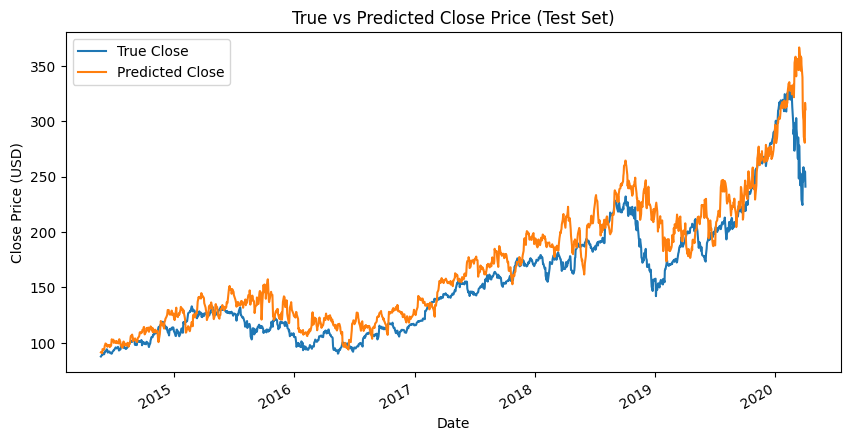

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(dates_test, y_test, label='True Close')
plt.plot(dates_test, y_test_pred, label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('True vs Predicted Close Price (Test Set)')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()